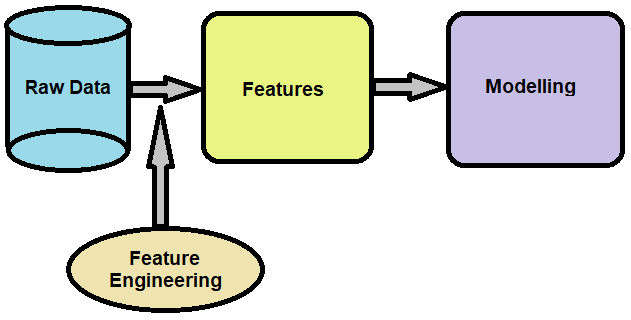

---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('/content/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df1=df.copy()
df2=df.copy()
df3=df.copy()
df4=df.copy()
df5=df.copy()
df6=df.copy()
df7=df.copy()
df8=df.copy()
df9=df.copy()
df10=df.copy()
df11=df.copy()
df12=df.copy()
df13=df.copy()
df15=df.copy()
df16=df.copy()
df17=df.copy()

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## **Encoding**
1. label encoding
2. one hot encoding
3. ordinal encoding

# ***Label Encoder***

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
le=LabelEncoder()

In [12]:
df1.region = le.fit_transform(df1.region)
df1.sex = le.fit_transform(df1.sex)
df1.smoker = le.fit_transform(df1.smoker)

In [13]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


***Label Encode looping***

In [14]:
from pandas.core.dtypes.common import is_numeric_dtype

In [15]:
for col in df2.columns:
  if is_numeric_dtype(df2[col]):
    continue
  df2[col] = le.fit_transform(df2[col])

In [16]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# ***One Hot Encoder***

In [17]:
dummy_all= pd.get_dummies(df3)


In [18]:
dummy_all.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [19]:
dummy_drop=pd.get_dummies(df3,drop_first=True)

In [20]:
dummy_drop.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


***One Hot Encoding loop***

In [21]:
for col in df4.columns:
  dum=pd.get_dummies(df4,drop_first=True)
  new_df4 = pd.concat([df4, dum], axis=1).drop(['sex','smoker','region'], axis=1)

In [22]:
new_df4.head()

,age,bmi,children,charges,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,32,28.880,0,3866.85520,1,0,1,0,0


***Ordinal Encoding***

In [23]:
df5.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [24]:
from sklearn.preprocessing import OrdinalEncoder

In [25]:
oe=OrdinalEncoder()

In [26]:
oe_val = oe.fit_transform(df5[['sex','smoker','region']])

In [27]:
oe_val

array([[0., 1., 3.],
       [1., 0., 2.],
       [1., 0., 2.],
       ...,
       [0., 0., 2.],
       [0., 0., 3.],
       [0., 1., 1.]])

In [28]:
oe_val=pd.DataFrame(oe_val,columns=['Sex','Smoker','Region'])

In [29]:
df6.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
oe_val.head()

,Sex,Smoker,Region
0,0.0,1.0,3.0
1,1.0,0.0,2.0
2,1.0,0.0,2.0
3,1.0,0.0,1.0
4,1.0,0.0,1.0


In [31]:
df5=pd.concat([df5,oe_val],axis=1).drop(['sex','smoker','region'],axis=1)

In [32]:
df5.head()

,age,bmi,children,charges,Sex,Smoker,Region
0,19,27.900,0,16884.92400,0.0,1.0,3.0
1,18,33.770,1,1725.55230,1.0,0.0,2.0
2,28,33.000,3,4449.46200,1.0,0.0,2.0
3,33,22.705,0,21984.47061,1.0,0.0,1.0
4,32,28.880,0,3866.85520,1.0,0.0,1.0


***Ordinal Encoding with loop***

In [33]:
for col in df6.columns:
  if is_numeric_dtype(df6[col]):
    continue
  #oe.catagories=[df6[col].unique()]
  encoded_values=oe.fit_transform(df6[[col]])
  encoded=pd.DataFrame(encoded_values,columns=[col+''])
  df6[col]=encoded

In [34]:
df6.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


# **The End**

---

